# Assignment 3

Name : Harsha Singh


# Problem statement

To predict the revenue of an ice-cream shop using decision tree regression, based on temperature for 500 days. 
X - Temperature (Decision Variable)
Y - Revenue (Target)

In [694]:
#Import the essential libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [695]:
# Read the dataset in csv file using pandas
revenue_data = pd.read_csv("Datasets/IceCreamData.csv")

In [696]:
revenue_data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [697]:
##Display the number of columns/rows
revenue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


Both columns have no null values so we can proceed

In [698]:
revenue_data.shape

(500, 2)

500 days temperature and 2 features indicating the temperature and revenue

In [699]:
#To get the statistical summary
revenue_data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [700]:
revenue_data = revenue_data.round(3)

In [701]:
#To get the statistical summary
revenue_data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232232,521.570762
std,8.096389,175.404760
min,0.000000,10.000000
25%,17.122500,405.558250
50%,22.393000,529.368500
75%,27.740250,642.257750
max,45.000000,1000.000000


In [702]:
revenue_data.head(4)

,Temperature,Revenue
0,24.567,534.799
1,26.005,625.190
2,27.791,660.632
3,20.595,487.707


Rounding the decimal data to precision of 3.

In [703]:
#Let's check if any duplicate rows

In [704]:
revenue_data[revenue_data.duplicated()]

,Temperature,Revenue


No duplicate rows so let's proceed

# Data Vizualization

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

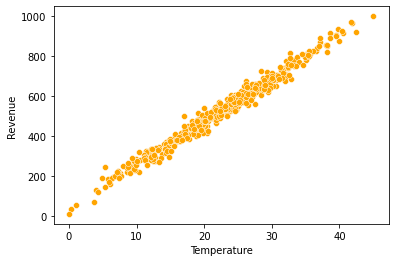

In [705]:
# Using seaborn plot a scatter plot
sns.scatterplot(data=revenue_data,x="Temperature",y="Revenue",color='orange')

 We can observe a positive correlation between the variables – so, as the temperature increases, the ice cream sales increase.

<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

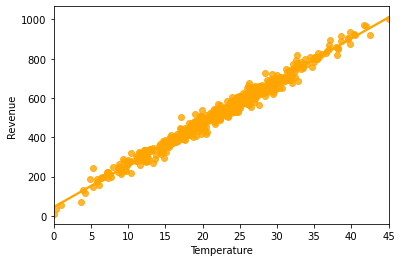

In [36]:
sns.regplot(data=revenue_data,x="Temperature",y="Revenue",color='orange')

In [41]:
#Using corr function also gives high correlation values for Temp & Revenue
revenue_data.corr()

,Temperature,Revenue
Temperature,1.000000,0.989802
Revenue,0.989802,1.000000


# Hence In above graph we can see,it can fit pretty well on a straight line.Hence there is a strong, positive, linear correlation observed here.

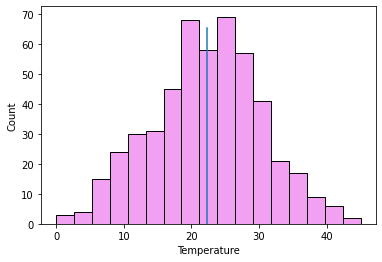

In [720]:
sns.histplot(data=revenue_data, x="Temperature",color="violet")
plt.axvline(22.232225,0,0.9)

In [ ]:
Notice highest temperatures are around 70 can be 68 and 69

In [78]:
revenue_data['Temperature'].mean()

22.232231999999996

From the histogram we can see the data of temperatures is normally distributed
Hence we normally distributed decision variable

<AxesSubplot:xlabel='Revenue', ylabel='Count'>

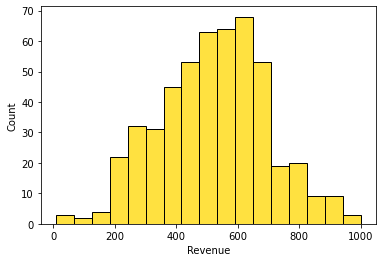

In [81]:
sns.histplot(data=revenue_data, x="Revenue",color="gold")

<AxesSubplot:xlabel='Temperature'>

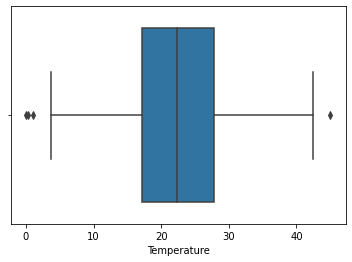

In [85]:
sns.boxplot(data=revenue_data,x="Temperature")

Temperature data is perfectly symmetrical and normally distributed

<AxesSubplot:xlabel='Revenue'>

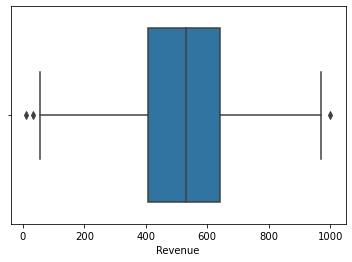

In [86]:
sns.boxplot(data=revenue_data,x="Revenue")

Notice revenues lie in the range of 400 to 600 with the mean being 521.5. A few outliers noticed.
The revenue column data looks normally distributed , but from histogram plot we see a very minor skew towards right, but data is still approximately a normal distribution itself

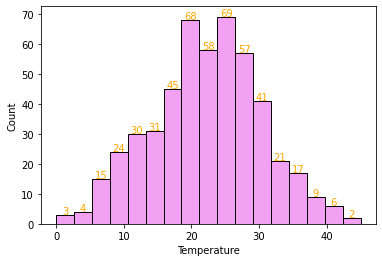

In [74]:
ax = sns.histplot(data=revenue_data, x="Temperature",color="violet")

# label each bar in histogram
for p in ax.patches:
    height = p.get_height() # get the height of each bar
 # adding text to each bar
    ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
    y = height+0.2, # y-coordinate position of data label, padded 0.2 above bar
    s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
    ha = 'center', color = 'orange') # sets horizontal alignment (ha) to center

In [87]:
# Decision Tree Model

In [129]:
features = revenue_data['Temperature'].values.reshape(1,-1)
target = revenue_data['Revenue'].values.reshape(1,-1)

In [659]:
features = revenue_data[['Temperature']]
target = revenue_data['Revenue']

features = revenue_data.Temperature.values.reshape(-1,1)
target = revenue_data['Revenue'].values.reshape(-1,1)

In [660]:
features.shape

(500, 1)

In [661]:
target.shape

(500,)

# Split the dataset into Training set and Test sets of 80% and 20% respectively 

In [662]:
from sklearn.model_selection import train_test_split

In [663]:
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=51)

# X_train contains 80% of total dataset
print(X_train.shape)
print(y_train.shape)
# X_test contains 20% of total dataset
print(X_test.shape)
print(y_test.shape)

(400, 1)
(400,)
(100, 1)
(100,)


In [664]:
#Import the decision tree regressor
from sklearn.tree import DecisionTreeRegressor
#Instantiate a decision tree object
regressor = DecisionTreeRegressor(max_depth=3)

In [665]:
# Let's fit the training data
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [666]:
print("Accuracy score of trained dataset")
regressor.score(X_train,y_train)

Accuracy score of trained dataset


0.9539724546202073

In [667]:
print("Accuracy score of test dataset")
regressor.score(X_test,y_test)

Accuracy score of test dataset


0.9506764515781929

We observe the scores are approximately nearby values We can thus, say the decision tree is generalised to work with test data set and trained

95% accuracy, implies this tree predicted 95% of observations correctly for the entire 20% of the testing data that was not fitted to learn

# Prediction

In [668]:
predictions = regressor.predict(X_test)
predictions.shape

(100,)

In [669]:
y_test.shape

(100,)

In [670]:
# We will try to predict on the trained data too
y_train_predict = regressor.predict(X_train)
y_train_predict.shape

(400,)

# Model Evaluation

In [671]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [672]:
rmse = (np.sqrt(mean_squared_error(y_train,y_train_predict)))
r2=r2_score(y_train,y_train_predict)
mae=mean_absolute_error(y_train,y_train_predict)

print(" The model performance of training set")
print("******--------------*******")
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))
print("mean_absolute_error is {}".format(mae))
print("\n")



 The model performance of training set
******--------------*******
RMSE is 37.950155962305374
R2 score is 0.9539724546202073
mean_absolute_error is 30.040315263786557




In [673]:
n=500  # Number of observations
k=1    # Number of independent variables (here temperature explains variability of revenue)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9538800298302881


In [674]:
rmse = (np.sqrt(mean_squared_error(y_test,predictions)))
r2=r2_score(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)


print(" The model performance of testing set")
print("******--------------*******")
print("RMSE is",rmse)
print("R2 score is",r2)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))

print("\n")

 The model performance of testing set
******--------------*******
RMSE is 37.32795486933883
R2 score is 0.9506764515781929
Mean Absolute Error: 31.120001830242916




In [675]:
n=500  # Number of observations
k=1    # Number of independent variables (here temperature explains variability of revenue)
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.9505774083082696


# Evaluation Points:
1. Higher the R2 Score, higher is the explanabality of the variance of the revenue target variable by the temperature feature
2. Notice RMSE is approximately same for both training and test dataset, means model behaves accurately for seen and unseen data
3. The adjusted R square is not showing any significant change when compared to R square, hence the model is predicting fine.
4. Additionally the values are closer to one, hence better performance